In [1]:
!pip install pytorch_lightning
!pip install optuna
!pip install torchvision

In [2]:
import cv2
import numpy as np

import torch, optuna, time, torchvision
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import matplotlib.pyplot as plt


import time
import numpy as np
from torch.utils.tensorboard import SummaryWriter

In [3]:
# Size to which original images should be resized.
image_size = (32,32)

# Number of samples we want to look at
train_split_len = 10
# CIFAR10 Classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def get_loaders(batch_size=128, num_workers=2, train_transform=transforms.ToTensor()):
    train = datasets.CIFAR10('../data', train=True, download=True, transform=train_transform)
    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, num_workers=num_workers, shuffle=False)
    return train_loader

In [4]:
# Our function from homeworks
def img_show(img, opencv=False):
    if opencv:
        img_to_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_to_show = img
    plt.figure(dpi=50)
    plt.axis('off')
    plt.imshow(img_to_show)
    plt.show()

***CropImage*** transform take crop_size as an argument for cropping. Based on its type (tuple, int or float) it peforms a cropping. For our task, tuple (of top, bottom, left, right) is more convenient since we want to crop only bottom part.

In [5]:
class CropImage(object):
    def __init__(self, crop_size):
        self.crop_size = crop_size

    def __call__(self, sample):
        image=sample
        h, w = image.shape[1:]
        type_crop = type(self.crop_size)

        if type_crop == int:
            top=bottom=left=right=self.crop_size
        elif type_crop == tuple:
            top, bottom, left, right = self.crop_size
        elif type_crop == float and self.crop_size >0 and self.crop_size <1:
            top=bottom=h-(h*self.crop_size)
            left=right=w-(w*self.crop_size)
        else:
            raise Exception(ValueError)
            
        image = image[:,0+top : h-bottom, 0+left : w-right]
        return image


In [6]:
train_transform=transforms.Compose([
    transforms.Resize(image_size, interpolation=2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    CropImage((0,10,0,0)),
])

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Tensor shape: torch.Size([8, 3, 22, 32]) BatchxCxHxW
frog


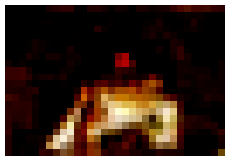

truck


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


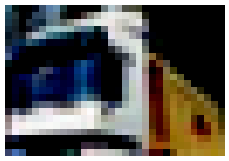

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck


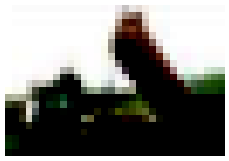

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


deer


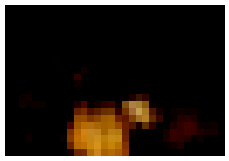

car


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


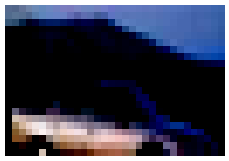

car


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


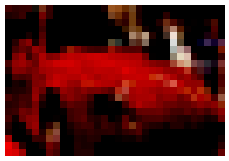

bird


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


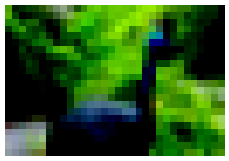

horse

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


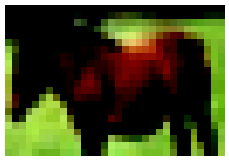

In [7]:
train_loader = get_loaders(8, train_transform=train_transform)
images, labels = iter(train_loader).next()
print("Tensor shape: {} BatchxCxHxW".format(images.shape))
labels = labels.numpy()
for i in range(images.shape[0]):
    print(classes[labels[i]])
    img = images[i, ...].numpy()
    img = np.moveaxis(img, 0, 2)
    img_show(img)

Cropping is working as expected, Image is reshaped to 32x32 and then 10 pixels from bottom side are subtracted, which results in a 22x32 size. We see that images are a bit cropped from the bottom.